<a href="https://colab.research.google.com/github/KHUSHI-K2/khushikoilakonda-Ai-ml-projects-labs-submission/blob/main/Project_Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv


In [ ]:
data = pd.read_csv("heart.csv")
data.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

In [ ]:
data.shape

(303, 14)

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [ ]:
data.head(20)

age     sex                cp  trestbps  chol  fbs  restecg  thalach  \
0    63    Male  non-anginal pain       145   233    1        0      150   
1    37    Male   atypical_angina       130   250    0        1      187   
2    41  Female    typical_angina       130   204    0        0      172   
3    56    Male    typical_angina       120   236    0        1      178   
4    57  Female                 0       120   354    0        1      163   
5    57    Male                 0       140   192    0        1      148   
6    56  Female    typical_angina       140   294    0        0      153   
7    44    Male    typical_angina       120   263    0        1      173   
8    52    Male   atypical_angina       172   199    1        1      162   
9    57    Male   atypical_angina       150   168    0        1      174   
10   54    Male                 0       140   239    0        1      160   
11   48  Female   atypical_angina       130   275    0        1      139   
12   49    Male    typical_angina       130   266    0        1      171   
13   64    Male  non-anginal pain       110   211    0        0      144   
14   58  Female  non-anginal pain       150   283    1        0      162   
15   50  Female   atypical_angina       120   219    0        1      158   
16   58  Female   atypical_angina       120   340    0        1      172   
17   66  Female  non-anginal pain       150   226    0        1      114   
18   43    Male                 0       150   247    0        1      171   
19   69  Female  non-anginal pain       140   239    0        1      151   

   exang  oldpeak             slope  ca               thal   target  
0     No      2.3  non-anginal pain   0       fixed_defect  Disease  
1     No      3.5   atypical_angina   0  reversable_defect  Disease  
2     No      1.4    typical_angina   0  reversable_defect  Disease  
3     No      0.8    typical_angina   0  reversable_defect  Disease  
4    Yes      0.6                 0   0  reversable_defect  Disease  
5     No      0.4                 0   0       fixed_defect  Disease  
6     No      1.3    typical_angina   0  reversable_defect  Disease  
7     No      0.0    typical_angina   0             normal  Disease  
8     No      0.5   atypical_angina   0             normal  Disease  
9     No      1.6   atypical_angina   0  reversable_defect  Disease  
10    No      1.2                 0   0  reversable_defect  Disease  
11    No      0.2   atypical_angina   0  reversable_defect  Disease  
12    No      0.6    typical_angina   0  reversable_defect  Disease  
13   Yes      1.8  non-anginal pain   0  reversable_defect  Disease  
14    No      1.0  non-anginal pain   0  reversable_defect  Disease  
15    No      1.6   atypical_angina   0  reversable_defect  Disease  
16    No      0.0   atypical_angina   0  reversable_defect  Disease  
17    No      2.6  non-anginal pain   0  reversable_defect  Disease  
18    No      1.5                 0   0  reversable_defect  Disease  
19    No      1.8  non-anginal pain   2  reversable_defect  Disease

Text(0.5, 1.0, 'Heart Disease classes')

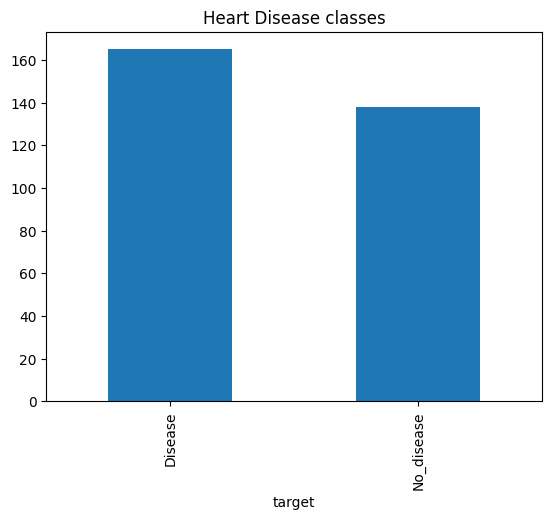

In [ ]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease classes')

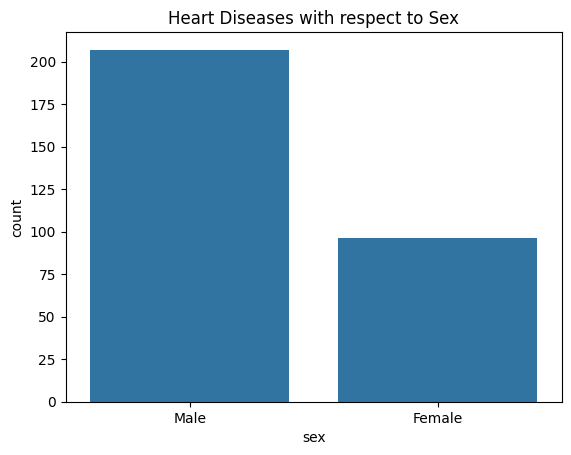

In [ ]:
sns.barplot(data['sex'].value_counts())
plt.title('Heart Diseases with respect to Sex')
plt.show()

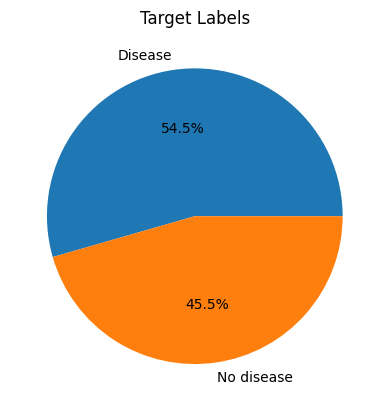

In [ ]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

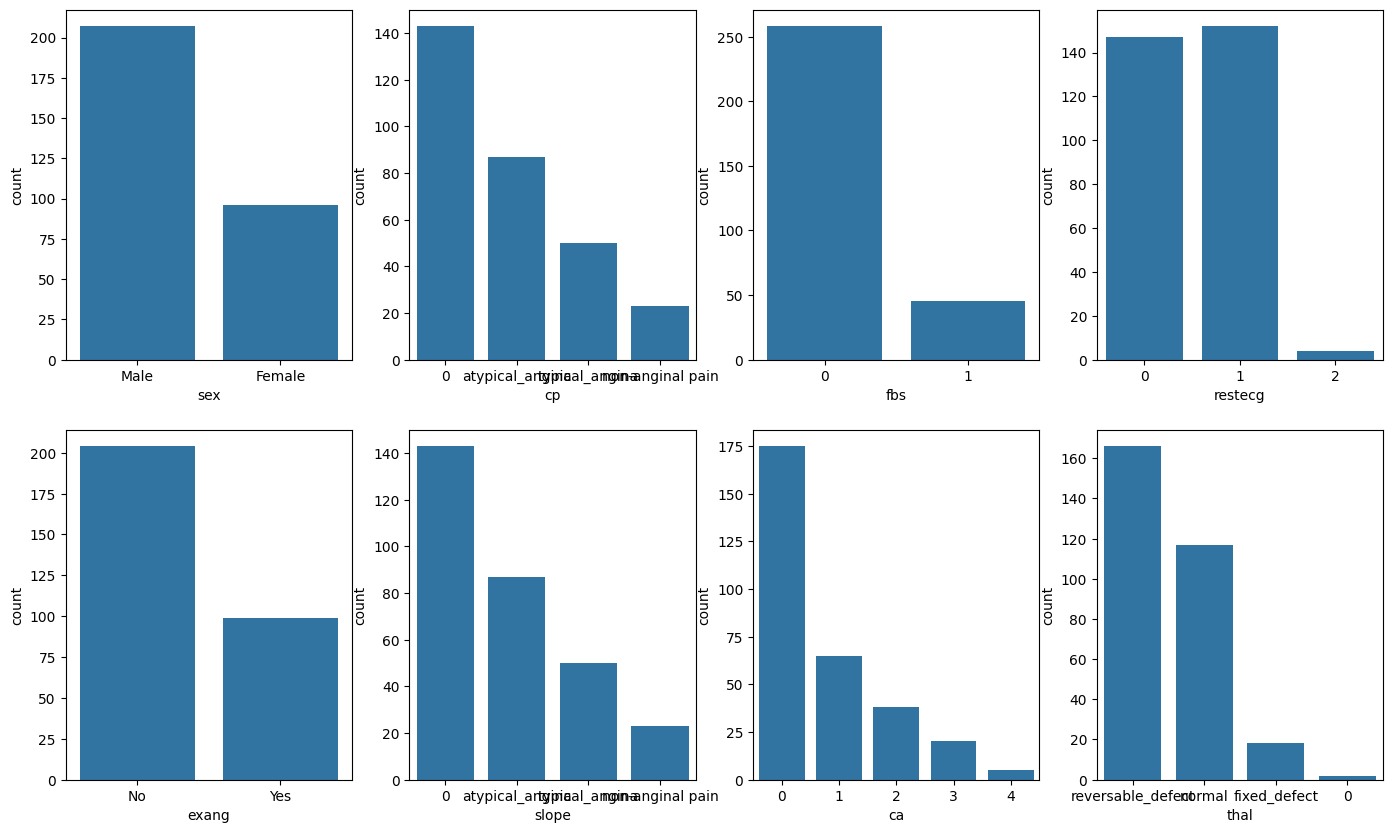

In [ ]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/4), idx%4]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

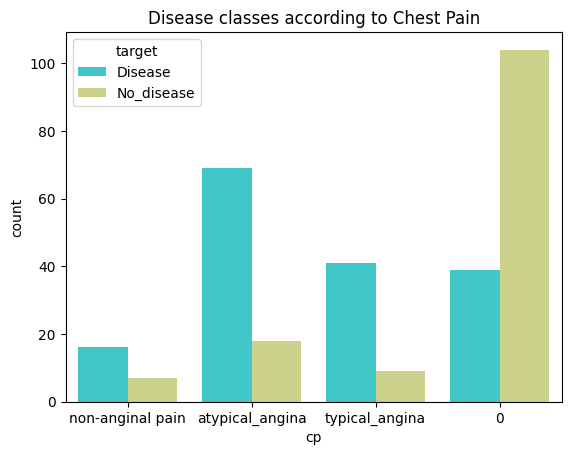

In [ ]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

In [ ]:
data1=data[data['target']=='Disease']#data 1 only contains the data which have only affected people
data1.head()

age     sex                cp  trestbps  chol  fbs  restecg  thalach exang  \
0   63    Male  non-anginal pain       145   233    1        0      150    No   
1   37    Male   atypical_angina       130   250    0        1      187    No   
2   41  Female    typical_angina       130   204    0        0      172    No   
3   56    Male    typical_angina       120   236    0        1      178    No   
4   57  Female                 0       120   354    0        1      163   Yes   

   oldpeak             slope  ca               thal   target  
0      2.3  non-anginal pain   0       fixed_defect  Disease  
1      3.5   atypical_angina   0  reversable_defect  Disease  
2      1.4    typical_angina   0  reversable_defect  Disease  
3      0.8    typical_angina   0  reversable_defect  Disease  
4      0.6                 0   0  reversable_defect  Disease

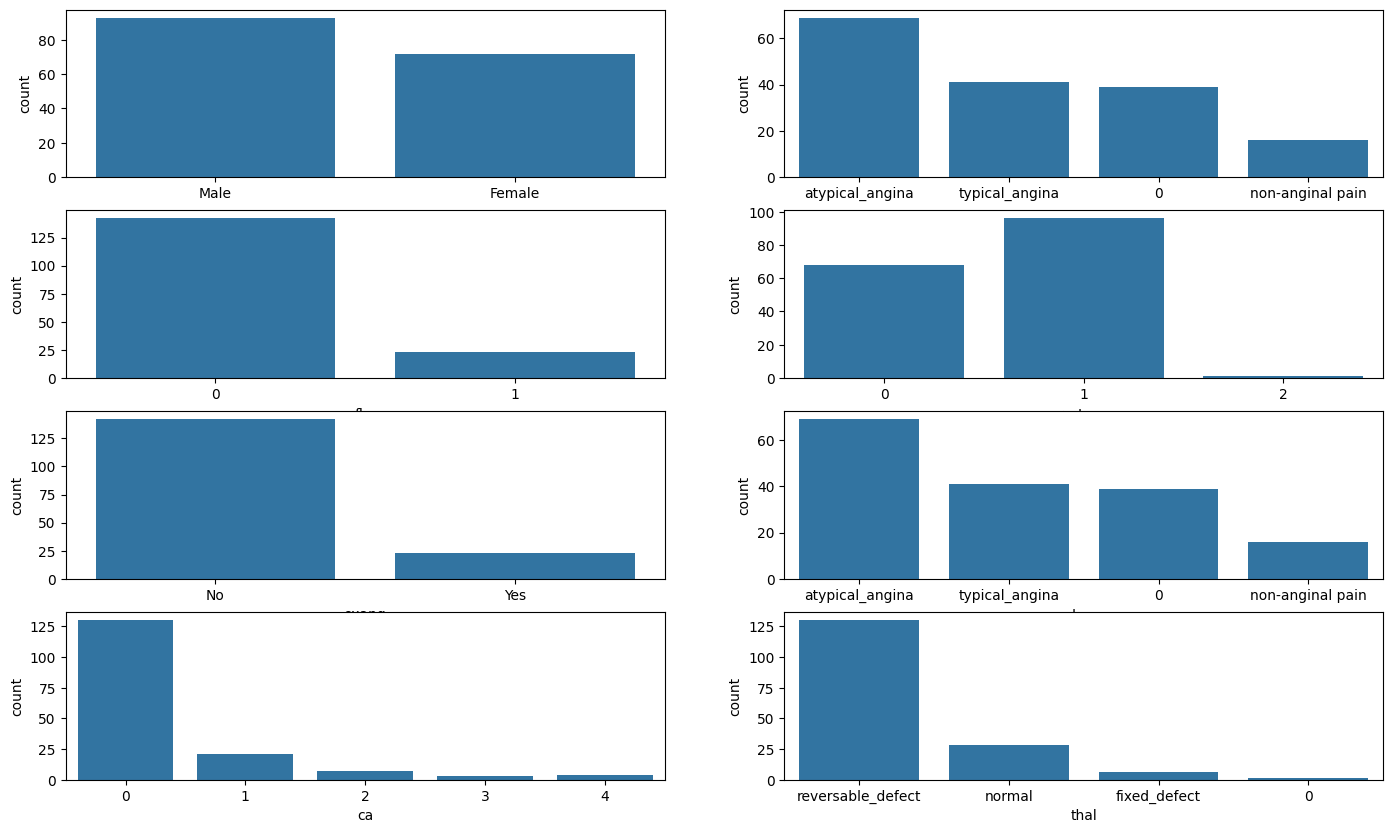

In [ ]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
#Here we are only considering the data of the persons who having the heart disease.
for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/2), idx%2]
    sns.barplot(data1[feature].value_counts(), ax=ax)

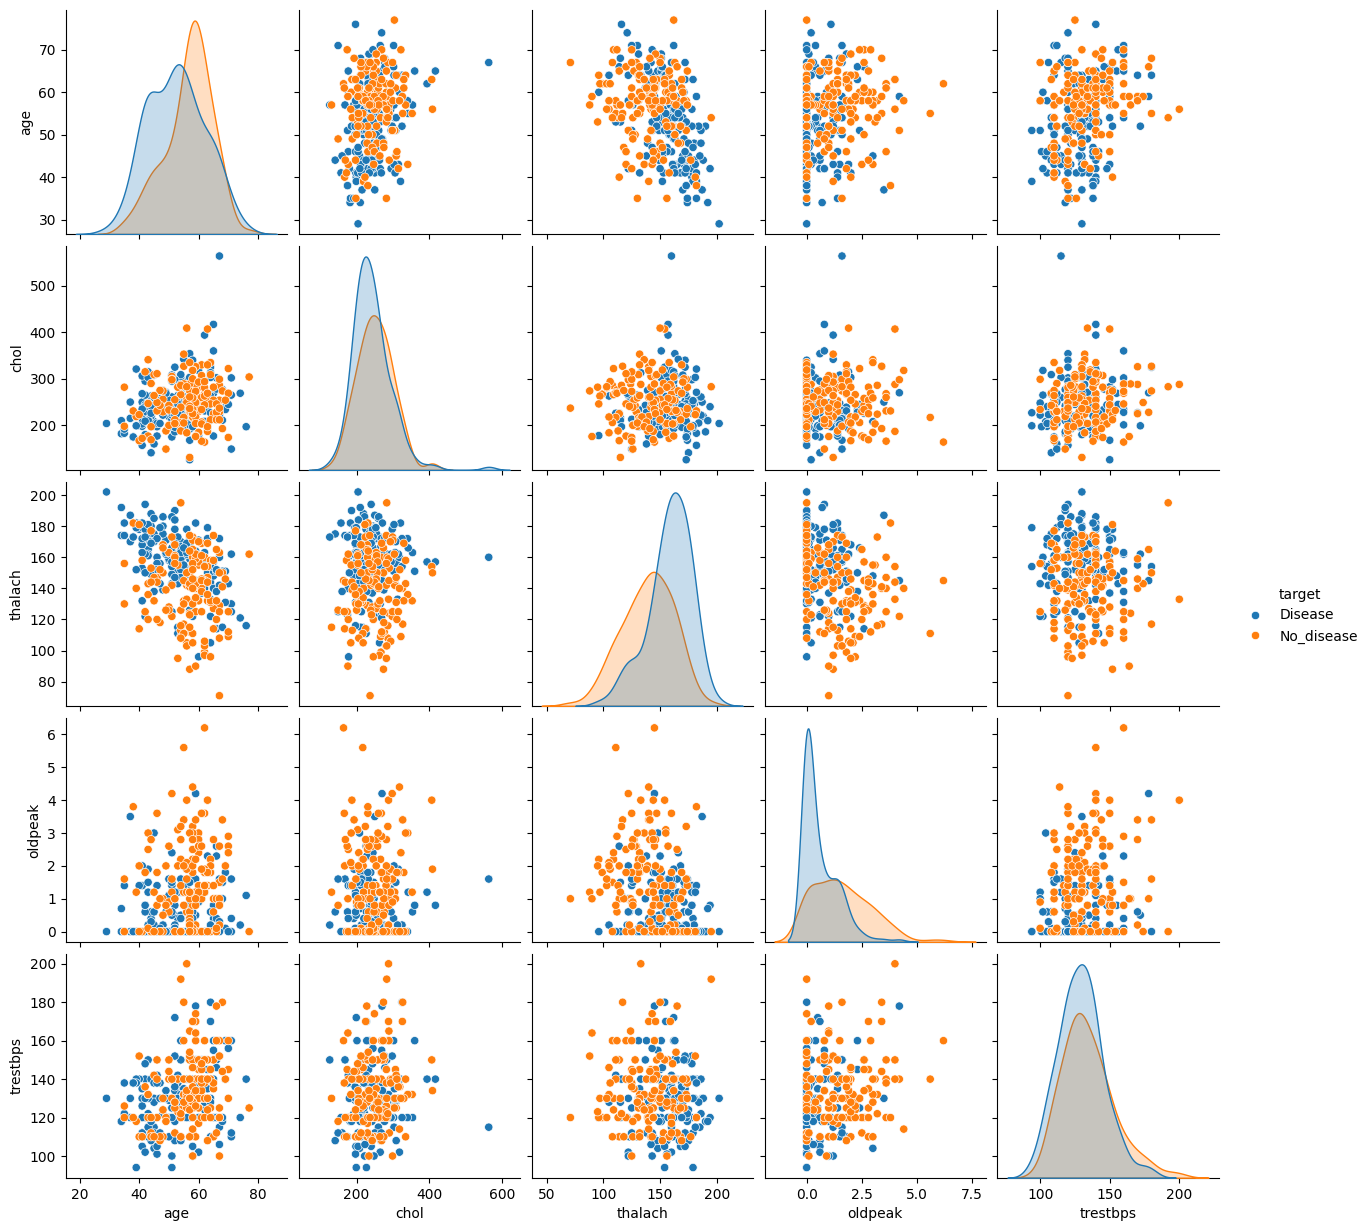

In [ ]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

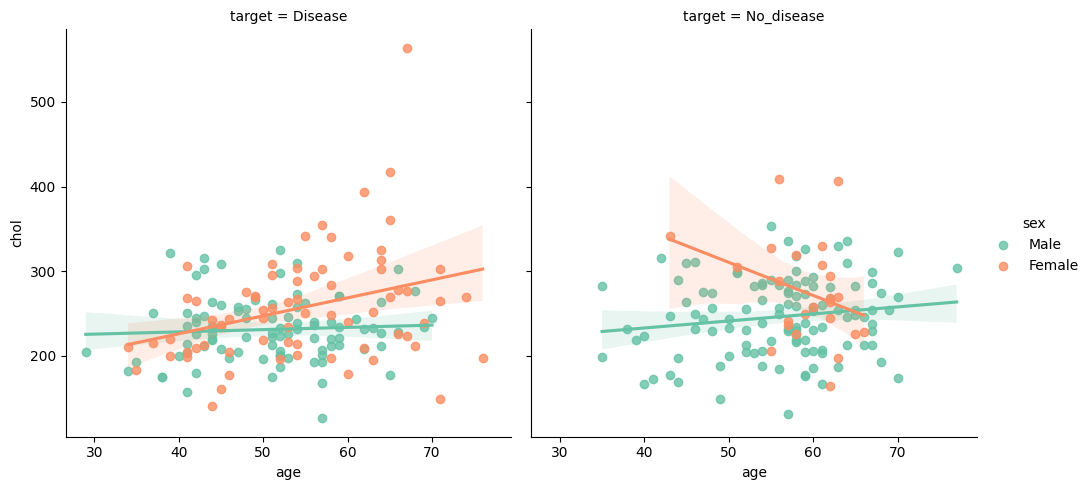

In [ ]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set2",
           data=data)
plt.show()

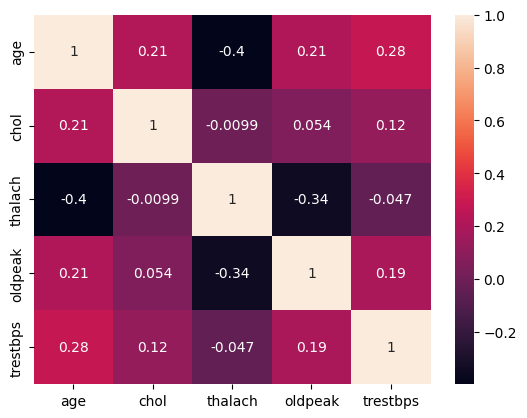

In [ ]:
numeric_data = data[continous_features]
# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

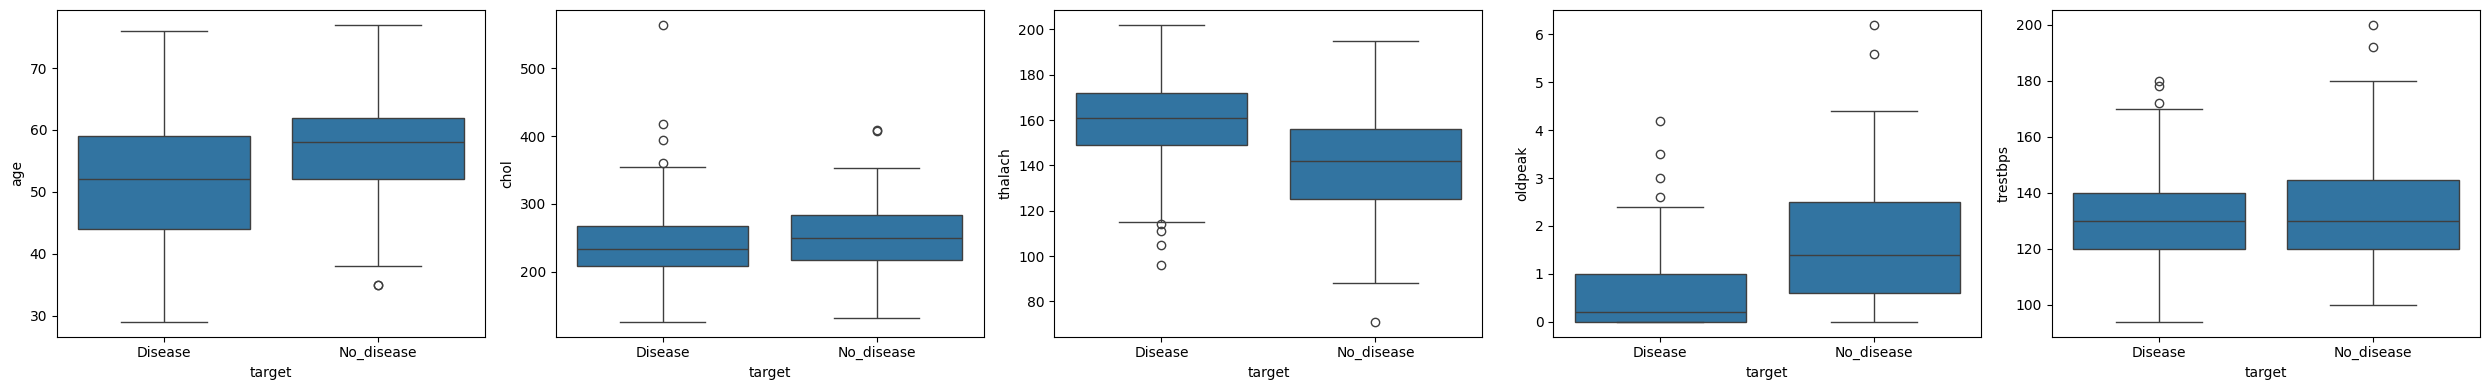

In [ ]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)
for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

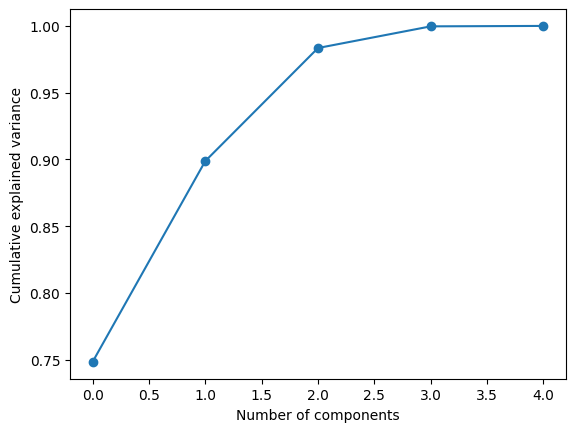

In [ ]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

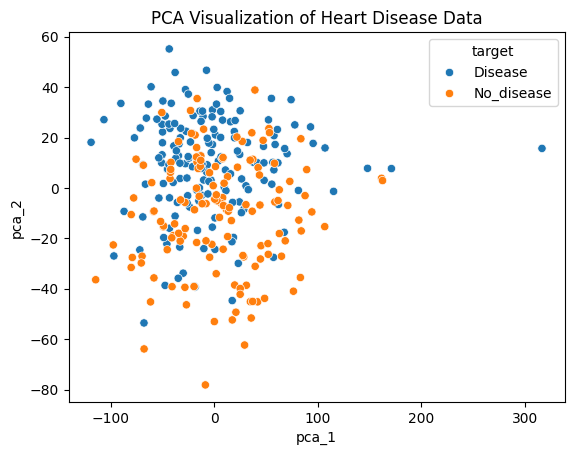

In [ ]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()

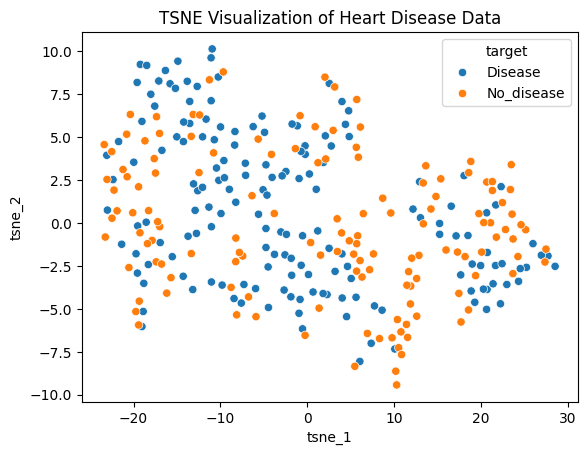

In [ ]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()

In [ ]:
#data1 gives the data set of no of samples who had disease..
print("The shape of the data set which had only the samples of the patients who had disease is ",data1.shape)
#where data is the dataset of the total no.of samples considered..
print("The shape of the total data set considered is ",data.shape)
#So,the percentage of Samples with disease is
print((165/303)*100)

The shape of the data set which had only the samples of the patients who had disease is  (165, 14)
The shape of the total data set considered is  (303, 14)
54.45544554455446


1) What is the percentage of Samples with Disease?


```
Answer
```
A) 54.45544554455446%


2)what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?

```
# Answer
```
So, the 3 continuos features that shows a significant statistical difference in diatribution is talach , age , oldpeak.


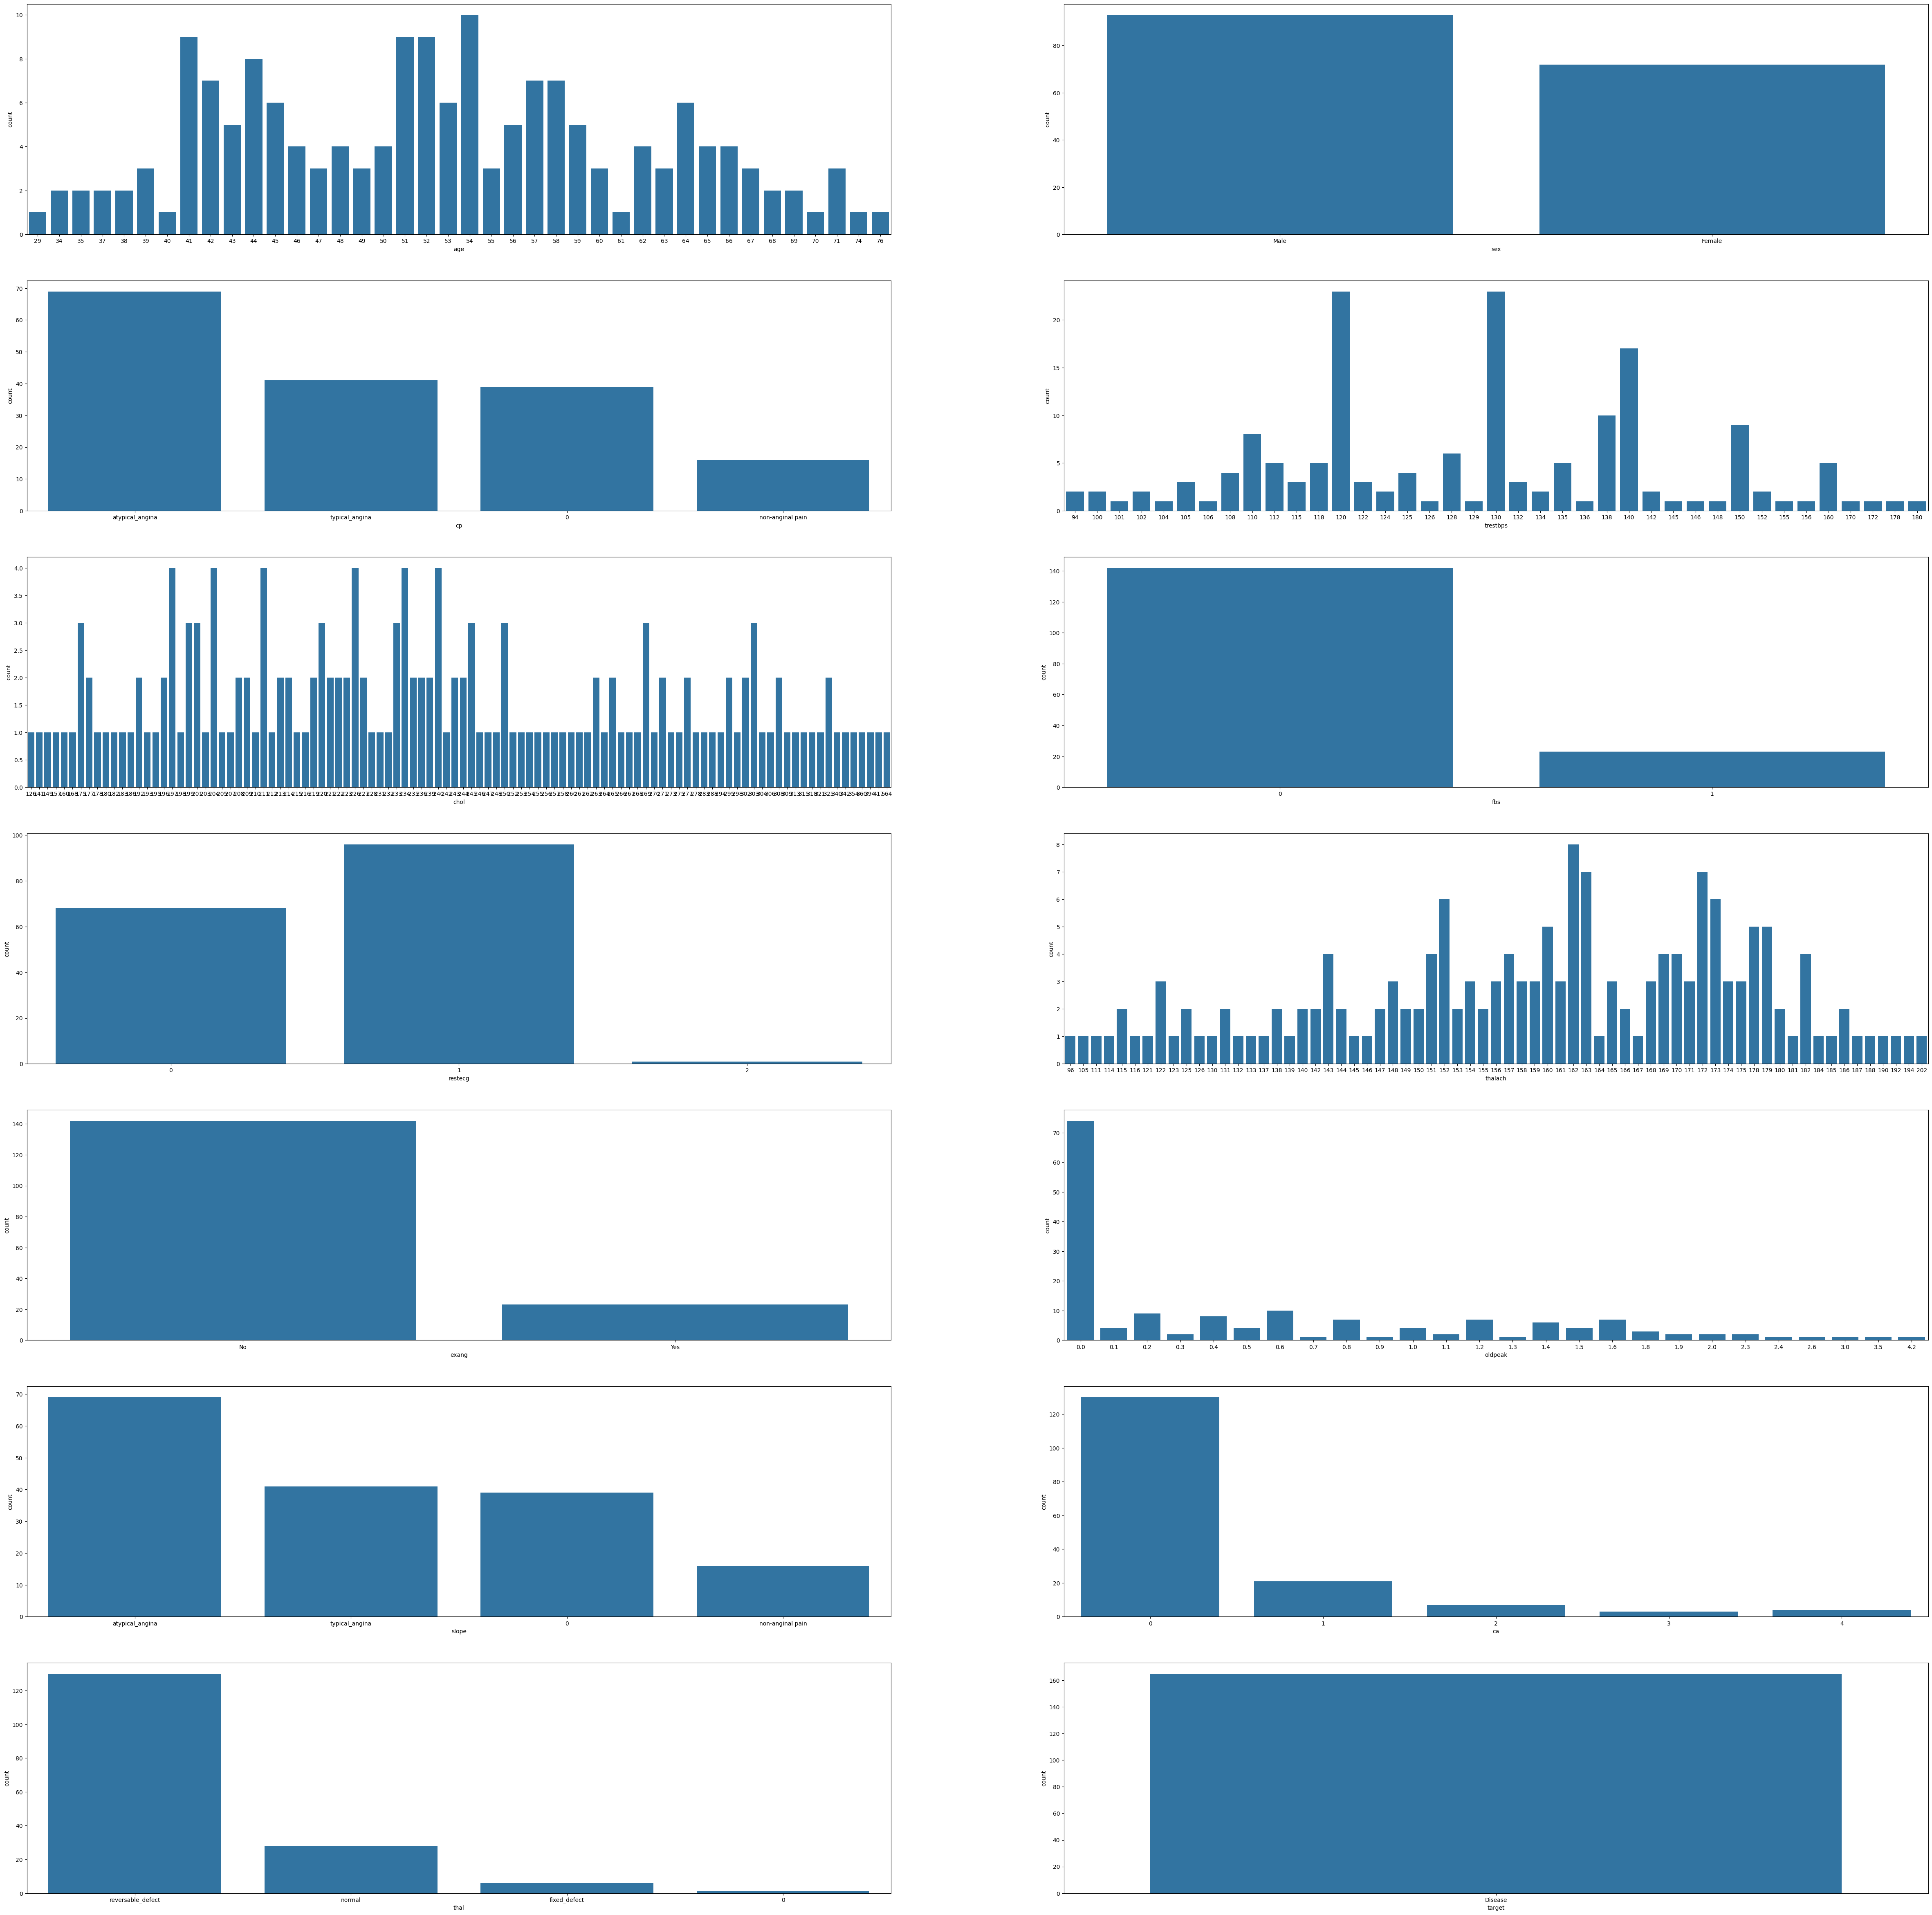

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(60,60))
features  = data1.columns
#Here we are only considering the data of the persons who having the heart disease.
for idx, feature in enumerate(features):
    ax = axes[int(idx/2), idx%2]
    sns.barplot(data1[feature].value_counts(), ax=ax)

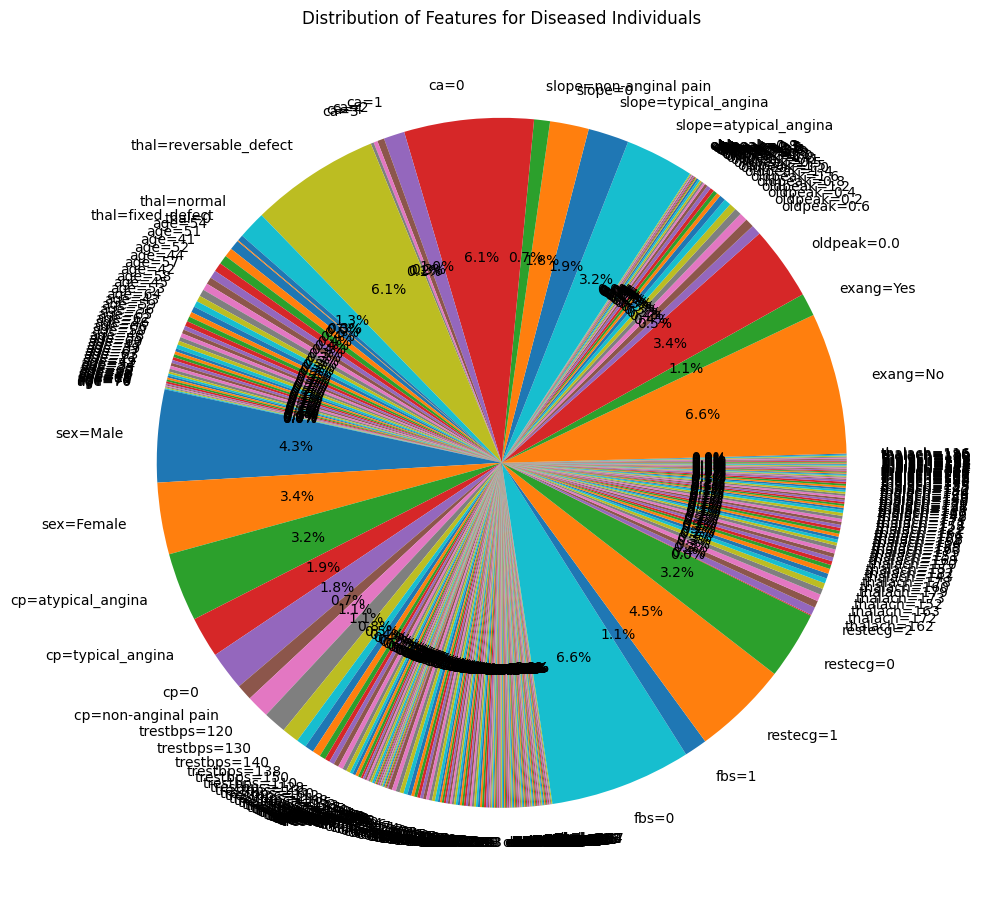

In [ ]:
pie_data = {}

# Accumulate value counts for all features in the diseased group
for feature in data.columns[:-1]:  # Exclude 'target' column
    counts = data1[feature].value_counts()
    for value, count in counts.items():
        pie_data[f"{feature}={value}"] = pie_data.get(f"{feature}={value}", 0) + count

# Prepare data for the pie chart
labels = list(pie_data.keys())
sizes = list(pie_data.values())

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Features for Diseased Individuals')
plt.tight_layout()
plt.show()

In [ ]:
data2=data[data['target']=='No_disease']#data 2 only contains the data which have only Non-affected people

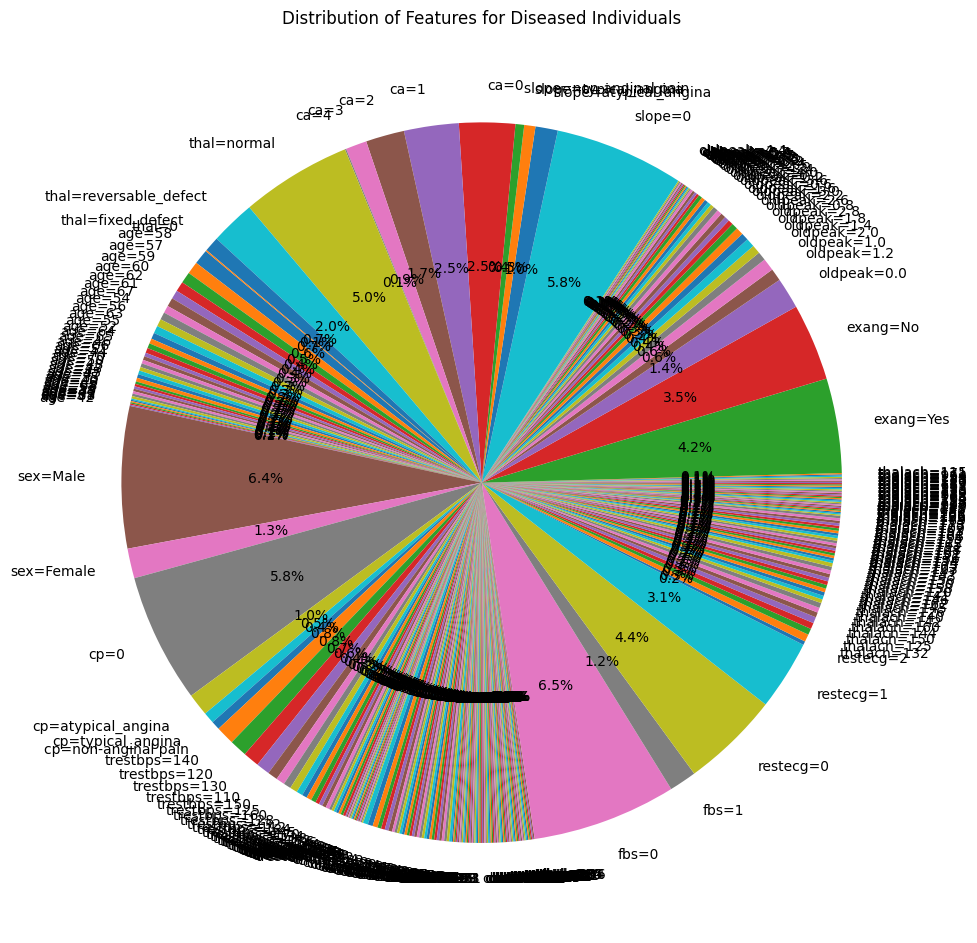

In [ ]:
pie_data = {}

# Accumulate value counts for all features in the diseased group
for feature in data.columns[:-1]:  # Exclude 'target' column
    counts = data2[feature].value_counts()
    for value, count in counts.items():
        pie_data[f"{feature}={value}"] = pie_data.get(f"{feature}={value}", 0) + count

# Prepare data for the pie chart
labels = list(pie_data.keys())
sizes = list(pie_data.values())

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Features for Diseased Individuals')
plt.tight_layout()
plt.show()

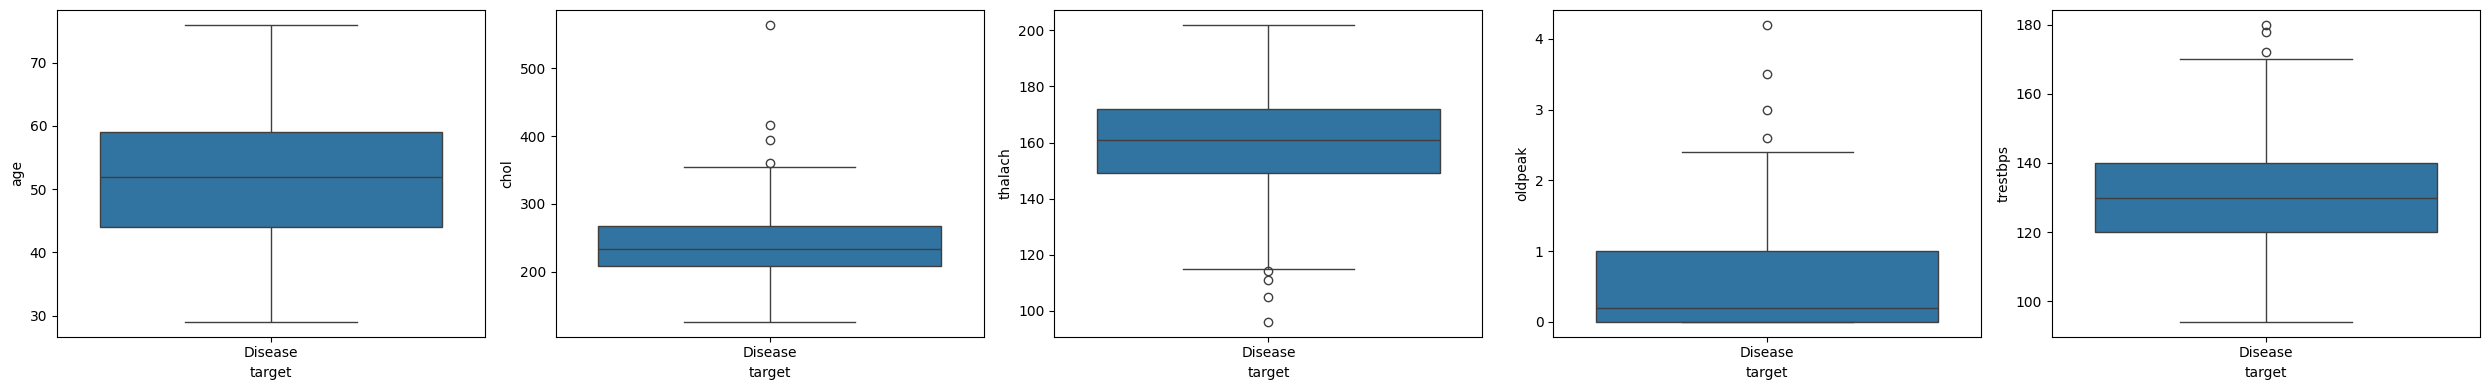

In [ ]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data1, ax=axes[idx])
plt.tight_layout()
plt.show()

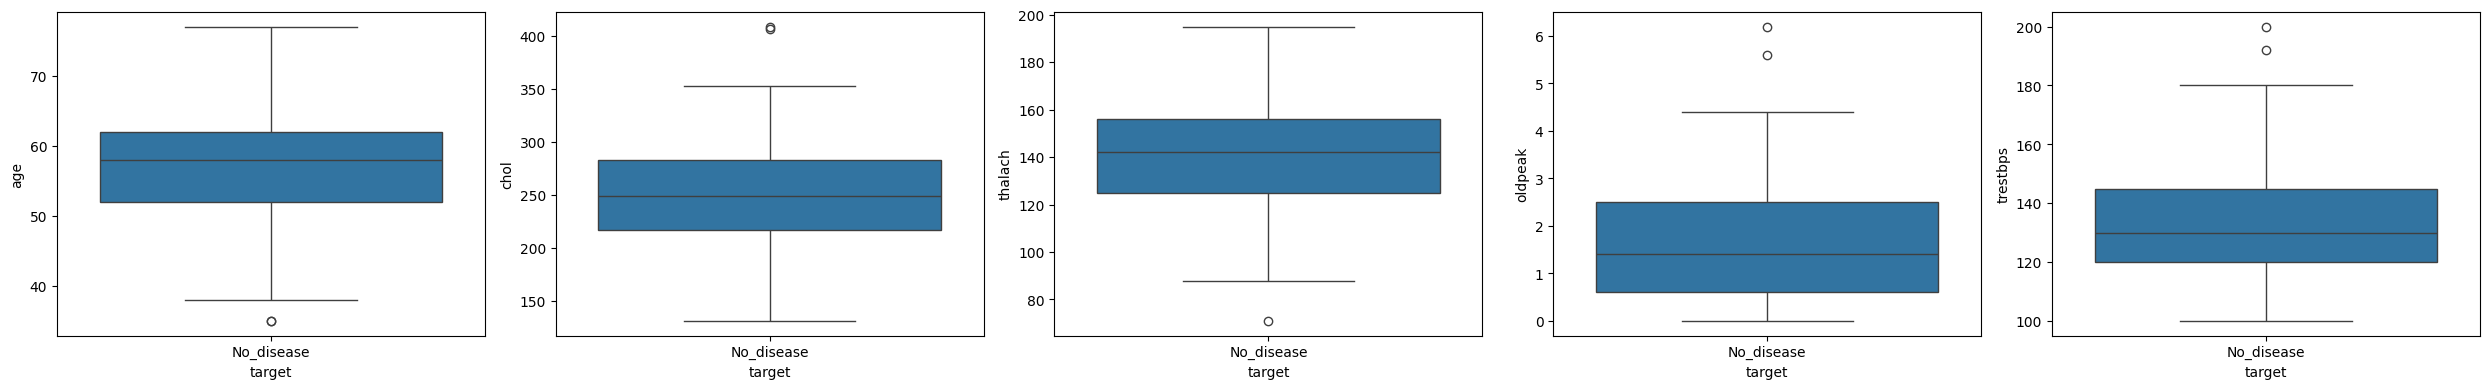

In [ ]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data2, ax=axes[idx])
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Define continuous features and target variable
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target = 'target'

# Separate data based on the target variable (0 = absence, 1 = presence of disease)
group_0 = data[data[target] == 'No_disease']
group_1 = data[data[target] == 'Disease']

# Performing t-tests for continuous features
results = {}
for feature in continuous_features:
    stat, p_value = ttest_ind(group_0[feature], group_1[feature], equal_var=False)
    results[feature] = p_value

# Sort features by the p-value to identify the most significant differences in the data set
sorted_results = sorted(results.items(), key=lambda x: x[1])

#to Print the top 3 features with the lowest p-values and these features show the significant differences.
print("Top 3 continuous features with significant statistical differences:")
for feature, p_value in sorted_results[:3]:
    print(f"{feature}: p-value = {p_value}")

Top 3 continuous features with significant statistical differences:
thalach: p-value = 5.018595443073072e-14
oldpeak: p-value = 1.1096104777240862e-13
age: p-value = 5.781030372508417e-05


3) Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?

```
# Answer
```



<ipython-input-59-8601d799749a>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['cp'] = data.cp.replace({"typical_angina": 1,
<ipython-input-59-8601d799749a>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['exang'] = data.exang.replace({"Yes": 1,"No": 0})
<ipython-input-59-8601d799749a>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_o

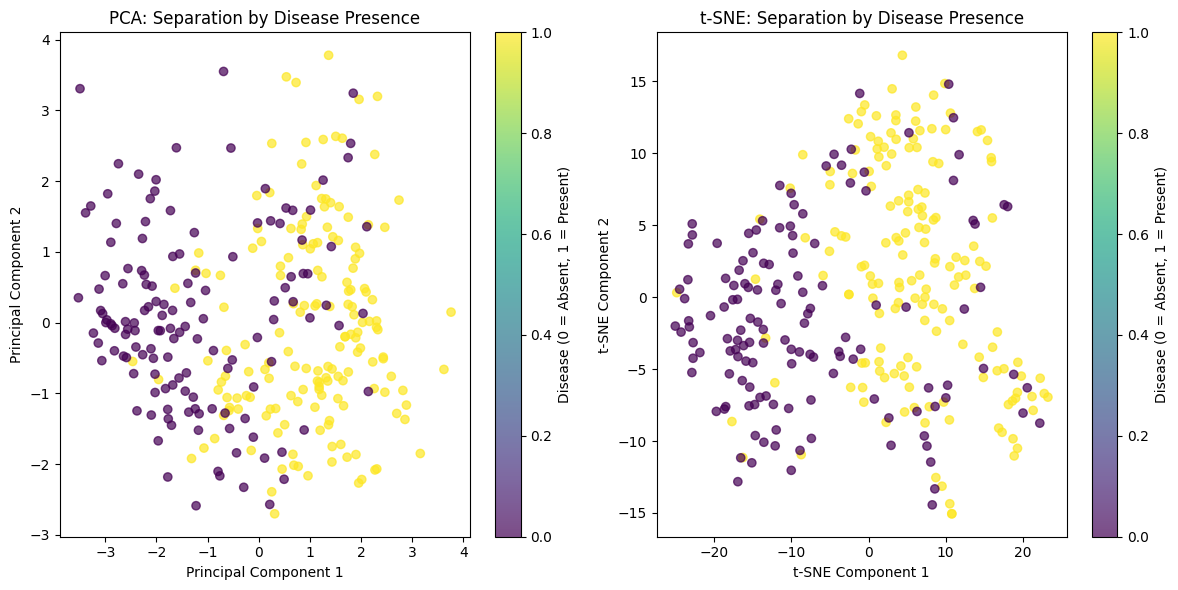

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
data['target'] = data.target.replace({"Disease": 1, "No_disease": 0})
data['sex'] = data.sex.replace({"Male": 1, "Female": 0})
data['cp'] = data.cp.replace({"typical_angina": 1,
                          "atypical_angina": 2,
                          "non-anginal pain": 3,
                          "asymtomatic": 4})
data['exang'] = data.exang.replace({"Yes": 1,"No": 0})
data['slope'] = data.cp.replace({"upsloping": 1,
                          "flat": 2,
                          "downsloping": 3})
data['thal'] = data.thal.replace({"fixed_defect": 1, "reversable_defect": 2,"normal": 3})
# Features and target separation
X = data.drop(columns=['target'])
y = data['target']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('PCA: Separation by Disease Presence')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Disease (0 = Absent, 1 = Present)')

# Plot t-SNE results
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('t-SNE: Separation by Disease Presence')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Disease (0 = Absent, 1 = Present)')

plt.tight_layout()
plt.show()


What is the optimal number of principal components in our case?

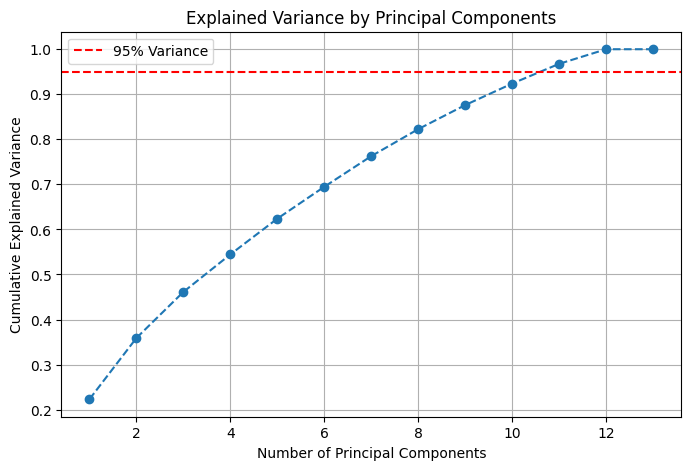

Optimal number of components to retain 95% variance: 11


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['target']))

# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend(loc='best')
plt.grid()
plt.show()

# Print the number of components required to retain 95% variance
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f'Optimal number of components to retain 95% variance: {optimal_components}')


what are the continous features with the highest correation with each other?

In [ ]:
# Defining continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#To Compute the correlation matrix
correlation_matrix = data[continuous_features].corr()
# Finding the highest correlated pair
correlation_matrix_abs = correlation_matrix.abs()  # Absolute correlation values
# Seting diagonal elements to 0 to exclude self-correlation
for col in correlation_matrix_abs.columns:
    correlation_matrix_abs.loc[col, col] = 0
# Finding the pair with the highest correlation
max_corr_pair = correlation_matrix_abs.unstack().idxmax()
max_corr_value = correlation_matrix_abs.unstack().max()
# Output the result
print(f"The continuous features with the highest correlation are: {max_corr_pair}")
print(f"Their correlation value is: {max_corr_value:.2f}")

The continuous features with the highest correlation are: ('age', 'thalach')
Their correlation value is: 0.40


In [ ]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [ ]:
data = pd.read_csv("star_nutri_expanded.csv")

In [ ]:
data.head()

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0           0.1            0.0                0.0            0   
1           0.1            0.0                0.0            0   
2           0.1            0.0                0.0            0   
3           0.1            0.0                0.0            0   
4           0.1            0.1                0.0            5   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                        5                 0                  0           0   
1                       10                 0                  0           0   
2                       10                 0                  0           0   
3                       10                 0                  0           0   
4                       75                10                  0           9   

   Protein (g) Vitamin A (% DV) Vitamin C (% DV) Calcium (% DV) Iron (% DV)  \
0          0.3               0%               0%             0%          0%   
1          0.5               0%               0%             0%          0%   
2          1.0               0%               0%             0%          0%   
3          1.0               0%               0%             2%          0%   
4          6.0              10%               0%            20%          0%   

  Caffeine (mg)  
0           175  
1           260  
2           330  
3           410  
4            75

In [ ]:
#Data manuplation in this we gonna fill the missing values and clean the data mean removing the duplicates
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [ ]:
data['Total Fat (g)'].unique() #Considering only the unique values from the Total Fat(g) feature

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [ ]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [ ]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)

Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


In [ ]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [ ]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [ ]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [ ]:
data = data.replace({True: 1, False: 0})

<ipython-input-74-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [ ]:
data.head()

Calories Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0         3           0.1            0.0                0.0            0   
1         4           0.1            0.0                0.0            0   
2         5           0.1            0.0                0.0            0   
3         5           0.1            0.0                0.0            0   
4        70           0.1            0.1                0.0            5   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                        5                 0                  0           0   
1                       10                 0                  0           0   
2                       10                 0                  0           0   
3                       10                 0                  0           0   
4                       75                10                  0           9   

   Protein (g)  ... bevp_Grande Nonfat Milk bevp_Short bevp_Short Nonfat Milk  \
0          0.3  ...                       0          1                      0   
1          0.5  ...                       0          0                      0   
2          1.0  ...                       0          0                      0   
3          1.0  ...                       0          0                      0   
4          6.0  ...                       0          0                      1   

  bevp_Solo  bevp_Soymilk  bevp_Tall  bevp_Tall Nonfat Milk  bevp_Venti  \
0         0             0          0                      0           0   
1         0             0          1                      0           0   
2         0             0          0                      0           0   
3         0             0          0                      0           1   
4         0             0          0                      0           0   

   bevp_Venti Nonfat Milk  bevp_Whole Milk  
0                       0                0  
1                       0                0  
2                       0                0  
3                       0                0  
4                       0                0  

[5 rows x 62 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    int64  
 1   Total Fat (g)                                            242 non-null    object 
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    int64  
 5   Total Carbohydrates (g)                                  242 non-null    int64  
 6   Cholesterol (mg)                                         242 non-null    int64  
 7   Dietary Fibre (g)                                        242 non-null    int64  
 8   Sugars (g)                    

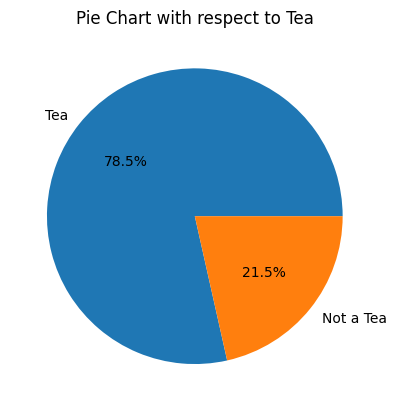

In [ ]:
# Create a pie chart of the 'Tea' column also write your observation form the plot
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['Tea'].value_counts(), labels=["Tea", "Not a Tea"], autopct='%1.1f%%')
plt.title('Pie Chart with respect to Tea')
plt.show()

The given data set represents the nutritional information of the items in a menu from a particular source like restaurant or cafe here Tea is one of the category that menu and from pie chart we can say that most of the menu of that source contains Tea Category beverages in it as i.e 78.5% is the percentage of Tea.  

perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?

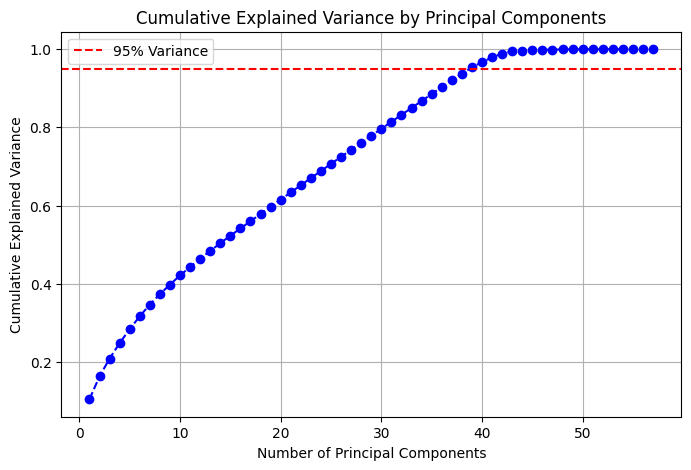

Optimal number of components to retain 95% variance: 39


In [ ]:
# Droping non-numeric columns and handling missing values this is the part of the data manuplation
numeric_data = data.select_dtypes(include=[np.number]).dropna()
# Standardization of  the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)
# Performing  PCA on the given data
pca = PCA()
pca.fit(X_scaled)
# Calculating cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
# Ploting the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend(loc='best')
plt.grid()
plt.show()
# Determine the optimal number of components for 95% variance
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f'Optimal number of components to retain 95% variance: {optimal_components}')

visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
Clear Clustering of the data represents the linearity of the data here wecan observe the the two clustered set of data points by this we can some what consider the provided data set is linear  

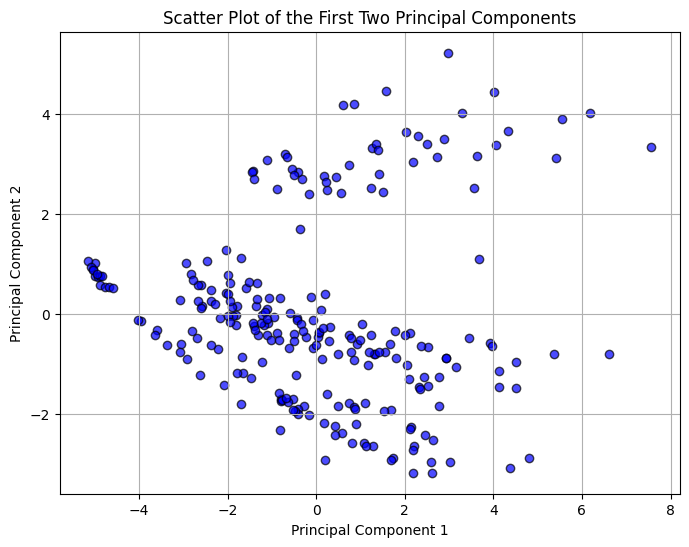

Variance explained by each component: [0.10427597 0.05840817]
Total variance explained by 2 components: 0.1626841399982511


In [ ]:
# Droping non-numeric columns and handling the missing values
numeric_data = data.select_dtypes(include=[np.number]).dropna()
# Standardization of the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)
# Performing PCA with the number of components that are chosen
n_components = 2  # Modifing based on the earlier analysis
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
# Creating a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title('Scatter Plot of the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()
# Observations from the plot
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by each component: {explained_variance}")
print(f"Total variance explained by {n_components} components: {sum(explained_variance)}")


plot the first 2 components of tsne, whats you observation from the plot?


```
# Answer
```
Here we couldnt able to find the clusters properly for the two components which means it is a non linear data so, its better to some of the other algorithms like isomap or random forest in order to analise the data more efficiently


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


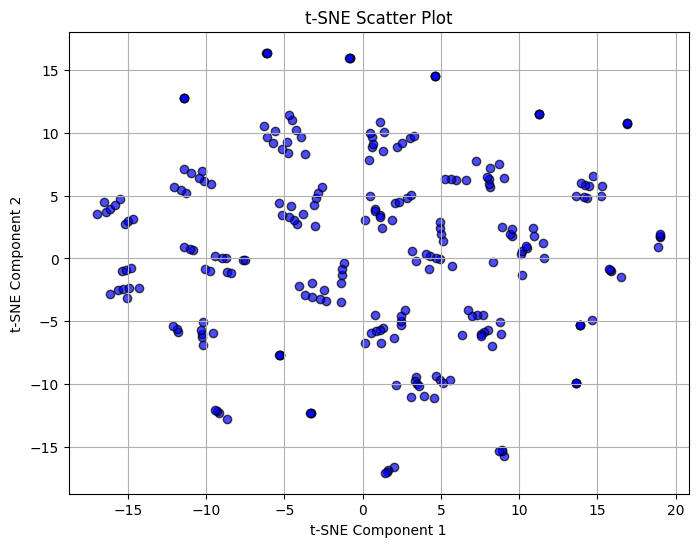

In [ ]:
# Droping the non-numeric columns and handling missing values
numeric_data = data.select_dtypes(include=[np.number]).dropna()

# Standardization of the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)

# Performing t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Creating a scatter plot of the t-SNE components
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title('t-SNE Scatter Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?


---
From the heat map we can say that the blocks which are having red color are having high correlation with each other and the one which are having blue color are weekly correlated to each other and the one which are having colors like light blue or red or orange are mediumly correlated.




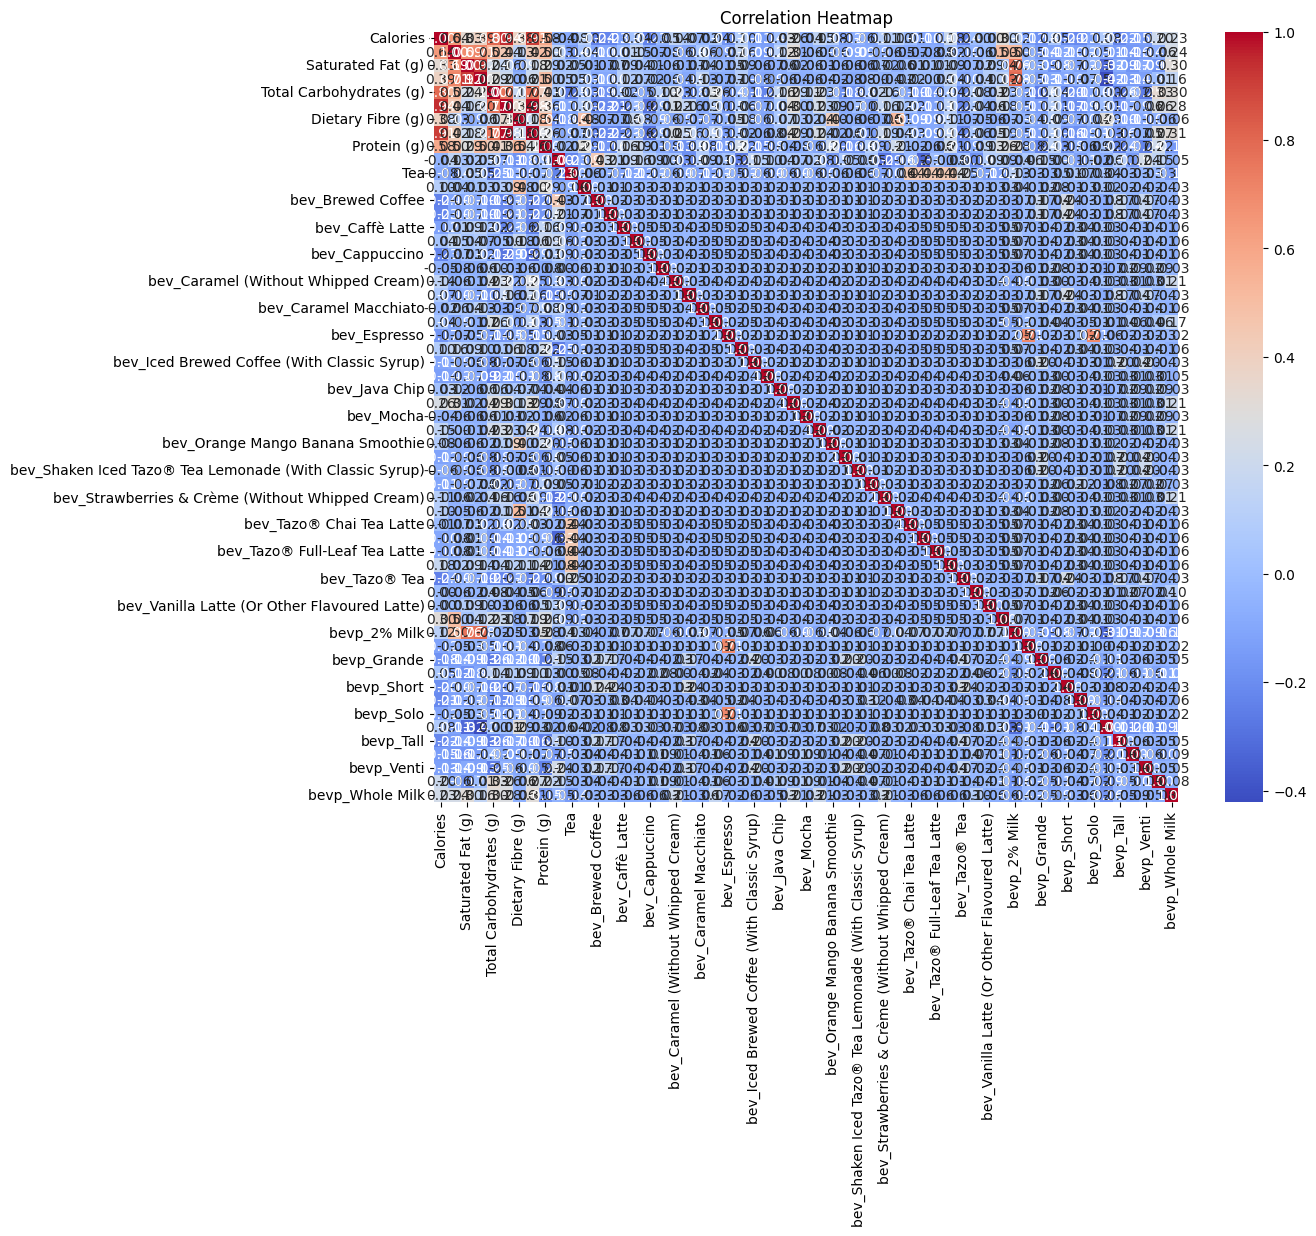

In [ ]:
# Selecting numeric columns and calculating the correlation matrix of them
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
# Ploting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?


---
The columns like Calories , Sodium(mg) , Total Carbohydrates(g) , cholestrol(mg) , Sugars(g) , Caffeine(mg) are the most potensial coloumns in the given data set.


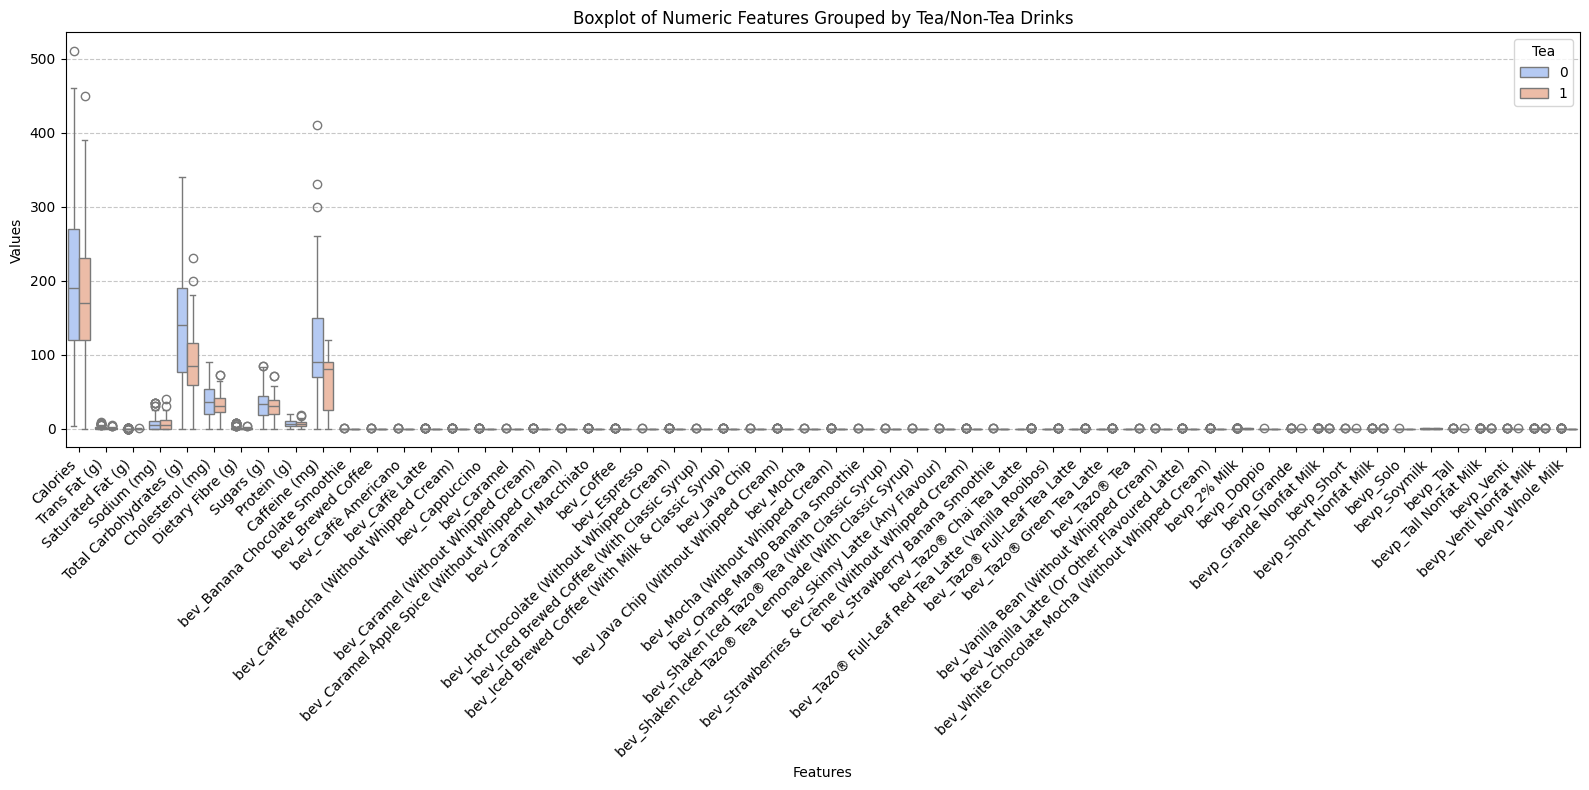

In [ ]:
# Selecting the numeric columns
numeric_data = data.select_dtypes(include=[np.number])
# Adding the 'Tea' column to the numeric dataset for grouping
if 'Tea' in data.columns:
    numeric_data['Tea'] = data['Tea']
else:
    print("Column 'Tea' not found in the dataset. Please check the column names.")

# Melt the numeric data for boxplot visualization
numeric_data_melted = numeric_data.melt(id_vars='Tea', var_name='Features', value_name='Values')

# Creating boxplots for all the features present in the dataset grouped by the 'Tea' column
plt.figure(figsize=(16, 8))
sns.boxplot(x='Features', y='Values', hue='Tea', data=numeric_data_melted, palette='coolwarm')
plt.title('Boxplot of Numeric Features Grouped by Tea/Non-Tea Drinks')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tea', loc='upper right')
plt.tight_layout()
plt.show()